# Real and Fake News Classifier

# Contents
The dataset contains text and metadata from 244 websites and represents 12,999 posts in total from the past 30 days. The data was pulled using the webhose.io API; because it's coming from their crawler, not all websites identified by the BS Detector are present in this dataset. Each website was labeled according to the BS Detector as documented here. Data sources that were missing a label were simply assigned a label of "bs". There are (ostensibly) no genuine, reliable, or trustworthy news sources represented in this dataset (so far), so don't trust anything you read.

# Fake news in the news
For inspiration, I've included some (presumably non-fake) recent stories covering fake news in the news. This is a sensitive, nuanced topic and if there are other resources you'd like to see included here, please leave a suggestion. From defining fake, biased, and misleading news in the first place to deciding how to take action (a blacklist is not a good answer), there's a lot of information to consider beyond what can be neatly arranged in a CSV file.

In [1]:
# IMPORTING THE REQUIRED LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
from nltk import FreqDist
import string
import spacy
nlp= spacy.load("en_core_web_sm")

# Data Preperation and EDA
In this section we gonna see about the data preperation and exploratory data analysis part.
All the operation and performed using Pandas, Numpy, Matplotlib and Seaborn.

In [2]:
# IMPORTING THE DATA
data = pd.read_csv("fake.csv")

In [3]:
data.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [4]:
data.columns

Index(['uuid', 'ord_in_thread', 'author', 'published', 'title', 'text',
       'language', 'crawled', 'site_url', 'country', 'domain_rank',
       'thread_title', 'spam_score', 'main_img_url', 'replies_count',
       'participants_count', 'likes', 'comments', 'shares', 'type'],
      dtype='object')

In [5]:
data.shape

(12999, 20)

In [6]:
data['language'].unique()

array(['english', 'ignore', 'german', 'french', 'spanish', 'russian',
       'greek', 'finnish', 'portuguese', 'arabic', 'dutch', 'italian',
       'turkish', 'norwegian', 'chinese', 'polish'], dtype=object)

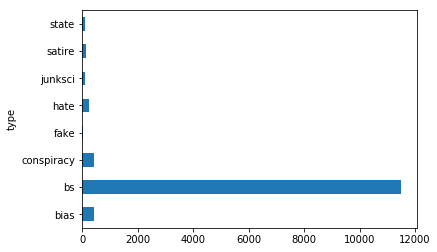

In [8]:
data.groupby(["type"]).size().plot(kind="barh")

In [9]:
txt = data["title"][1009]

In [10]:
doc = nlp(txt)

In [11]:
doc

Queen Elizabeth II owns every dolphin in Britain and doesn't need a driving licence and doesn't pay tax — here are the incredible powers you didn't know the monarchy has

In [12]:
txt

"Queen Elizabeth II owns every dolphin in Britain and doesn't need a driving licence and doesn't pay tax — here are the incredible powers you didn't know the monarchy has"

In [14]:
doc = nlp(txt)    
olist = []
for token in doc:
    l = [token.text,
        token.idx,
        token.lemma_,
        token.is_punct,
        token.is_space,
        token.shape_,
        token.pos_,
        token.tag_]
    olist.append(l)
    
odf = pd.DataFrame(olist)
odf.columns= ["Text", "StartIndex", "Lemma", "IsPunctuation", "IsSpace", "WordShape", "PartOfSpeech", "POSTag"]
odf

,Text,StartIndex,Lemma,IsPunctuation,IsSpace,WordShape,PartOfSpeech,POSTag
0,Queen,0,Queen,False,False,Xxxxx,PROPN,NNP
1,Elizabeth,6,Elizabeth,False,False,Xxxxx,PROPN,NNP
2,II,16,II,False,False,XX,PROPN,NNP
3,owns,19,own,False,False,xxxx,VERB,VBZ
4,every,24,every,False,False,xxxx,DET,DT
5,dolphin,30,dolphin,False,False,xxxx,NOUN,NN
6,in,38,in,False,False,xx,ADP,IN
7,Britain,41,Britain,False,False,Xxxxx,PROPN,NNP
8,and,49,and,False,False,xxx,CCONJ,CC
9,does,53,do,False,False,xxxx,AUX,VBZ


In [15]:
doc =nlp(txt)
olist= []
for ent in doc.ents:
    olist.append([ent.text,ent.label_])

In [16]:
odf = pd.DataFrame(olist)
odf.columns = ["Text", "EntityType"]
odf

,Text,EntityType
0,Elizabeth II,PERSON
1,Britain,GPE


# Performing noum phrase chunking using spacy

Phrase chunking means noun plus the words describing the noun

In [17]:
txt= data["title"][2012]

In [18]:
doc =nlp(txt)
olist= []
for chunk in doc.noun_chunks:
    olist.append([chunk.text, chunk.label_,chunk.root.text])
odf =pd.DataFrame(olist)
odf.columns=["NounPhrase","Label","RootWord"]
odf

,NounPhrase,Label,RootWord
0,Nukes,NP,Nukes
1,the UN,NP,UN
2,a Historic Treaty,NP,Treaty
3,Ban Nuclear Weapons,NP,Weapons


# Dependency Parser
A dependency parser analyzes the grammatical structure of a sentence, establishing relationships between "head" words and words which modify those heads - Stanford NLP

Spacy can be used to create these dependency parsers which can be used in a variety of tasks.

In [19]:
doc = nlp(data["title"][1009])
olist = []
for token in doc:
    olist.append([token.text, token.dep_, token.head.text, token.head.pos_,
          [child for child in token.children]])
odf = pd.DataFrame(olist)
odf.columns = ["Text", "Dep", "Head text", "Head POS", "Children"]
odf

,Text,Dep,Head text,Head POS,Children
0,Queen,compound,II,PROPN,[]
1,Elizabeth,compound,II,PROPN,[]
2,II,nsubj,owns,VERB,"[Queen, Elizabeth]"
3,owns,ccomp,are,AUX,"[II, dolphin, and, need]"
4,every,det,dolphin,NOUN,[]
5,dolphin,dobj,owns,VERB,"[every, in]"
6,in,prep,dolphin,NOUN,[Britain]
7,Britain,pobj,in,ADP,[]
8,and,cc,owns,VERB,[]
9,does,aux,need,VERB,[]


In [20]:
##########################-----------------######################-------------------##############################

In [21]:
data.loc[1,["title","text"]]

title    Re: Why Did Attorney General Loretta Lynch Ple...
text     Why Did Attorney General Loretta Lynch Plead T...
Name: 1, dtype: object

In [22]:
data.title.fillna("", inplace=True)
data.text.fillna("", inplace=True)
all_text = data.title.str.cat(data.text, sep=' ')

In [23]:
all_text

0        Muslims BUSTED: They Stole Millions In Gov’t B...
1        Re: Why Did Attorney General Loretta Lynch Ple...
2        BREAKING: Weiner Cooperating With FBI On Hilla...
3        PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...
4        FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...
5        Hillary Goes Absolutely Berserk On Protester A...
6        BREAKING! NYPD Ready To Make Arrests In Weiner...
7        WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...
8        BREAKING: CLINTON CLEARED...Was This A Coordin...
9        EVIL HILLARY SUPPORTERS Yell "F*ck Trump"…Burn...
10       YIKES! HILLARY GOES OFF THE RAILS…Pulls A Howa...
11       SAY GOODBYE! These 23 Hollywood Celebs Threate...
12       NOT KIDDING: Colleges Give Students “Safe Spac...
13       BOOM! MATH SHOWS Trump Would Have Beaten Obama...
14       BOOM! This Is How President Reagan Handled Pro...
15       TRUMP SUPPORTER GOT NUTS On MSNBC Reporter Cov...
16       TOMI LAHREN Has Special Message For Celebritie.

In [26]:
words

['Muslims',
 'BUSTED',
 ':',
 'They',
 'Stole',
 'Millions',
 'In',
 'Gov',
 '’',
 't',
 'Benefits',
 'Print',
 'They',
 'should',
 'pay',
 'all',
 'the',
 'back',
 'all',
 'the',
 'money',
 'plus',
 'interest',
 '.',
 'The',
 'entire',
 'family',
 'and',
 'everyone',
 'who',
 'came',
 'in',
 'with',
 'them',
 'need',
 'to',
 'be',
 'deported',
 'asap',
 '.',
 'Why',
 'did',
 'it',
 'take',
 'two',
 'years',
 'to',
 'bust',
 'them',
 '?',
 'Here',
 'we',
 'go',
 'again',
 '…another',
 'group',
 'stealing',
 'from',
 'the',
 'government',
 'and',
 'taxpayers',
 '!',
 'A',
 'group',
 'of',
 'Somalis',
 'stole',
 'over',
 'four',
 'million',
 'in',
 'government',
 'benefits',
 'over',
 'just',
 '10',
 'months',
 '!',
 'We',
 '’',
 've',
 'reported',
 'on',
 'numerous',
 'cases',
 'like',
 'this',
 'one',
 'where',
 'the',
 'Muslim',
 'refugees/immigrants',
 'commit',
 'fraud',
 'by',
 'scamming',
 'our',
 'system…It',
 '’',
 's',
 'way',
 'out',
 'of',
 'control',
 '!',
 'More',
 'Related

In [25]:
words= nltk.word_tokenize(" ".join(all_text.tolist()))

In [238]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Pushkar
[nltk_data]     Khetrapal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [239]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Pushkar
[nltk_data]     Khetrapal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
from nltk.corpus import stopwords
import string
stop_w= stopwords.words("english")
cleanwords = [i for i in words if i not in stop_w and i.isalpha() and len(i) > 2]

In [29]:
data

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
5,8f30f5ea14c9d5914a9fe4f55ab2581772af4c31,0,Barracuda Brigade,2016-11-02T16:31:28.550+02:00,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...,english,2016-11-02T16:31:28.550+02:00,100percentfedup.com,US,25689.0,Hillary Goes Absolutely Berserk On Protester A...,0.000,http://bb4sp.com/wp-content/uploads/2016/11/Fu...,0,1,0,0,0,bias
6,d3cc0fe38f41a59f7c48f8c3528ca5f74193148f,0,Fed Up,2016-11-04T19:40:00.000+02:00,BREAKING! NYPD Ready To Make Arrests In Weiner...,BREAKING! NYPD Ready To Make Arrests In Weiner...,english,2016-11-05T02:13:46.065+02:00,100percentfedup.com,US,25689.0,BREAKING! NYPD Ready To Make Arrests In Weiner...,0.701,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
7,b4bbf8b5c19e8864f5257832a58b81ef4ed2d4e4,0,Fed Up,2016-11-05T01:19:00.000+02:00,WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...,BREAKING! NYPD Ready To Make Arrests In Weiner...,english,2016-11-05T05:59:07.458+02:00,100percentfedup.com,US,25689.0,WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...,0.188,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
8,a19aabaa5a61eb8bc22fadaaa003e5fbba5c4bf6,0,Fed Up,2016-11-06T23:54:00.000+02:00,BREAKING: CLINTON CLEARED...Was This A Coordin...,\nLimbaugh said that the revelations in the Wi...,english,2016-11-07T10:20:06.409+02:00,100percentfedup.com,US,25689.0,BREAKING: CLINTON CLEARED...Was This A Coordin...,0.144,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
9,f54d8e13010d0a79893995ee65360ad4b38b5a35,0,Fed Up,2016-11-07T02:43:00.000+02:00,"EVIL HILLARY SUPPORTERS Yell ""F*ck Trump""…Burn...",Email \nThese people are sick and evil. They w...,english,2016-11-07T10:20:27.252+02:00,100percentfedup.com,US,25689.0,"EVIL HILLARY SUPPORTERS Yell ""F*ck Trump""…Burn...",0.995,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [30]:
cleanwords

['Muslims',
 'BUSTED',
 'They',
 'Stole',
 'Millions',
 'Gov',
 'Benefits',
 'Print',
 'They',
 'pay',
 'back',
 'money',
 'plus',
 'interest',
 'The',
 'entire',
 'family',
 'everyone',
 'came',
 'need',
 'deported',
 'asap',
 'Why',
 'take',
 'two',
 'years',
 'bust',
 'Here',
 'group',
 'stealing',
 'government',
 'taxpayers',
 'group',
 'Somalis',
 'stole',
 'four',
 'million',
 'government',
 'benefits',
 'months',
 'reported',
 'numerous',
 'cases',
 'like',
 'one',
 'Muslim',
 'commit',
 'fraud',
 'scamming',
 'way',
 'control',
 'More',
 'Related',
 'Why',
 'Did',
 'Attorney',
 'General',
 'Loretta',
 'Lynch',
 'Plead',
 'The',
 'Fifth',
 'Why',
 'Did',
 'Attorney',
 'General',
 'Loretta',
 'Lynch',
 'Plead',
 'The',
 'Fifth',
 'Barracuda',
 'Brigade',
 'Print',
 'The',
 'administration',
 'blocking',
 'congressional',
 'probe',
 'cash',
 'payments',
 'Iran',
 'course',
 'needs',
 'plead',
 'She',
 'either',
 'recall',
 'refuses',
 'answer',
 'plain',
 'deflects',
 'question',


In [31]:
## WORKIGN WITH BIGRAMS
bigrams = nltk.bigrams(cleanwords)

In [34]:
counter

Counter({('Muslims', 'BUSTED'): 1,
         ('BUSTED', 'They'): 1,
         ('They', 'Stole'): 1,
         ('Stole', 'Millions'): 1,
         ('Millions', 'Gov'): 1,
         ('Gov', 'Benefits'): 1,
         ('Benefits', 'Print'): 1,
         ('Print', 'They'): 1,
         ('They', 'pay'): 11,
         ('pay', 'back'): 42,
         ('back', 'money'): 10,
         ('money', 'plus'): 5,
         ('plus', 'interest'): 8,
         ('interest', 'The'): 20,
         ('The', 'entire'): 96,
         ('entire', 'family'): 31,
         ('family', 'everyone'): 2,
         ('everyone', 'came'): 5,
         ('came', 'need'): 1,
         ('need', 'deported'): 2,
         ('deported', 'asap'): 1,
         ('asap', 'Why'): 1,
         ('Why', 'take'): 8,
         ('take', 'two'): 12,
         ('two', 'years'): 405,
         ('years', 'bust'): 1,
         ('bust', 'Here'): 1,
         ('Here', 'group'): 1,
         ('group', 'stealing'): 1,
         ('stealing', 'government'): 4,
         ('government'

In [33]:
from collections import Counter
counter =Counter(bigrams)
print(counter.most_common(10))

[(('Hillary', 'Clinton'), 8692), (('Donald', 'Trump'), 6464), (('United', 'States'), 4888), (('White', 'House'), 2685), (('New', 'York'), 2508), (('Clinton', 'campaign'), 1557), (('Clinton', 'Foundation'), 1425), (('Bill', 'Clinton'), 1342), (('Barack', 'Obama'), 1194), (('Saudi', 'Arabia'), 1120)]


In [35]:
data.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


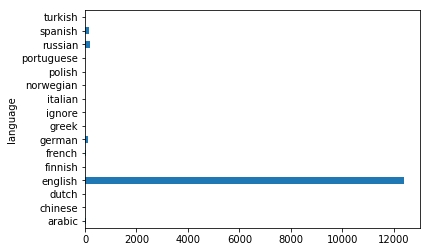

In [36]:
data.groupby("language").size().plot("barh")

In [37]:
Counter(data["language"])

Counter({'english': 12403,
         'ignore': 7,
         'german': 111,
         'french': 38,
         'spanish': 172,
         'russian': 203,
         'greek': 4,
         'finnish': 1,
         'portuguese': 11,
         'arabic': 22,
         'dutch': 3,
         'italian': 9,
         'turkish': 10,
         'norwegian': 3,
         'chinese': 1,
         'polish': 1})

# Filtering out the most uncommon words out from the whole corpus
For filtering we have filtered out the least occuring top 9000 words and most occuring 13000 words so as to form the data which is able to derive the most descrimination between the real and the fake data.

In [38]:
"""def filter_words(word,top_k=1000,bottom_k=1200):
    fdist= FreqDist(words)
    top_k_words= fdist.most_common(top_k)
    bottom_k_words= fdist.most_common(bottom_k)
    top_f= set(zip(*top_k_words))
    bottom_f= set(zip(*bottom_k_words))
    return(top_f,bottom_f)"""
## Dropping the least and most occuring words from the dictionary
top_k=9000
bottom_k=13000
fdist= FreqDist(words)
top_k_words= fdist.most_common(top_k)
bottom_k_words= fdist.most_common(bottom_k)
top_f= set(zip(*top_k_words))
bottom_f= set(zip(*bottom_k_words))

In [39]:
fdist

FreqDist({',': 427084, 'the': 424299, '.': 329082, 'of': 222784, 'to': 221757, 'and': 197369, 'a': 154512, 'in': 136869, '’': 110676, 'that': 107084, ...})

In [40]:
bottom_f

{(',',
  'the',
  '.',
  'of',
  'to',
  'and',
  'a',
  'in',
  '’',
  'that',
  'is',
  'for',
  's',
  '“',
  '”',
  'on',
  'The',
  'it',
  'with',
  'as',
  'are',
  'be',
  ':',
  'by',
  'was',
  'have',
  'I',
  'not',
  'this',
  'from',
  'has',
  'you',
  ')',
  'they',
  'at',
  '(',
  'an',
  'will',
  'Trump',
  'or',
  'he',
  'their',
  'Clinton',
  'we',
  'who',
  '?',
  'his',
  'all',
  'can',
  't',
  'about',
  'but',
  'been',
  'people',
  'would',
  'more',
  'which',
  'were',
  'Hillary',
  'one',
  'what',
  'It',
  'our',
  'In',
  'out',
  'said',
  'her',
  'had',
  'no',
  '–',
  'there',
  'if',
  'up',
  'This',
  'do',
  'into',
  'so',
  'your',
  'them',
  'its',
  'other',
  'when',
  '!',
  'than',
  'also',
  'like',
  "''",
  'just',
  '``',
  'she',
  'over',
  "'s",
  'US',
  '—',
  'We',
  '2016',
  'time',
  'only',
  'Obama',
  'some',
  'now',
  'even',
  'And',
  ';',
  'could',
  'because',
  '‘',
  'election',
  'these',
  'government'

In [41]:
bottom_k_words

[(',', 427084),
 ('the', 424299),
 ('.', 329082),
 ('of', 222784),
 ('to', 221757),
 ('and', 197369),
 ('a', 154512),
 ('in', 136869),
 ('’', 110676),
 ('that', 107084),
 ('is', 99672),
 ('for', 68866),
 ('s', 62966),
 ('“', 61933),
 ('”', 60576),
 ('on', 57501),
 ('The', 53137),
 ('it', 50579),
 ('with', 48962),
 ('as', 47540),
 ('are', 47178),
 ('be', 42435),
 (':', 42404),
 ('by', 41824),
 ('was', 41594),
 ('have', 39397),
 ('I', 38057),
 ('not', 36680),
 ('this', 35457),
 ('from', 33472),
 ('has', 32734),
 ('you', 31199),
 (')', 29554),
 ('they', 29013),
 ('at', 28921),
 ('(', 28845),
 ('an', 26567),
 ('will', 26246),
 ('Trump', 26062),
 ('or', 25013),
 ('he', 24427),
 ('their', 24408),
 ('Clinton', 24333),
 ('we', 24292),
 ('who', 22842),
 ('?', 22546),
 ('his', 21740),
 ('all', 20442),
 ('can', 19978),
 ('t', 19592),
 ('about', 19542),
 ('but', 19525),
 ('been', 18955),
 ('people', 18707),
 ('would', 17840),
 ('more', 17525),
 ('which', 17286),
 ('were', 16692),
 ('Hillary', 1666

# Cleaning out the text
All sort of data cleaning is performed in this secton where stopwords and least occuring words are removed from the doc included redundencies.
Also for furthur cleaning the words present in the documents are lemmatised for converting into their base words.
Along with that irrelevent punctuations are also removed from the data.
And finally all the changes with the words are merged into one sentence and returned

In [42]:
# FUNCTION FOR CLEANING OUT THE DATAFRAME'S COLUMNS WORDS
def dataclean(dff,words=words):
    #top_w, bottom_w=filter_words(words)
    table =str.maketrans("","",string.punctuation)
    words= dff.split(" ")
    desc= [lem.lemmatize(w.lower()) for w in words if not w in stop_w]
    #desc= [w for w in desc if w not in bottom_w]
    #desc= [w for w in desc if w not in top_w]
    desc= [w.translate(table) for w in desc]
    desc= [w for w in desc if w.isalpha()]
    desc= [w for w in desc if len(w)>2]
    desc= " ".join(desc)
    return(desc)

In [43]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Pushkar
[nltk_data]     Khetrapal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [44]:
x = data[data["language"]=="english"]["text"].apply(dataclean)

In [45]:
x

0        print they pay back money plus interest the en...
1        why did attorney general loretta lynch plead t...
2        red state news sunday reported morning anthony...
3        email kayla mueller prisoner tortured isi chan...
4        email healthcare reform make america great aga...
5        print hillary absolutely berserk she explodes ...
6        breaking nypd ready make arrest weiner visited...
7        breaking nypd ready make arrest weiner visited...
8        said revelation wikileaks material clinton ren...
9        email people sick evil they stop nothing get w...
10                                                        
11       comedian would move spain buy house another co...
12       student expressed trump presidency message sha...
13       email for republican politician like ohio gove...
14       copyright association liberty alliance all rig...
15       article trump supporter wearing trumppence tsh...
16       copyright association liberty alliance all rig.

In [46]:
y = data[data["language"]=="english"]["title"].apply(dataclean)

In [47]:
y

0                 muslim busted they stole million benefit
1        why did attorney general loretta lynch plead t...
2        breaking weiner cooperating with fbi hillary e...
3        pin drop speech father daughter kidnapped and ...
4        fantastic trumps point plan reform healthcare ...
5         hillary absolutely berserk protester rally video
6        breaking nypd ready make arrest weiner visited...
7        wow whistleblower tell chilling story massive ...
8        breaking clinton clearedwas this coordinated l...
9        evil hillary supporter yell fck truck daddy fi...
10                 yikes hillary off the howard dean video
11       say goodbye these hollywood celebs threatened ...
12       not kidding college give student cry over trum...
13       boom math show trump would have beaten obama r...
14       boom this how president reagan handled protest...
15       trump supporter got nut msnbc reporter coverin...
16       tomi lahren special message for celebrity who .

In [48]:
ddf = x.str.cat(y,sep=" ")

In [49]:
ddf

0        print they pay back money plus interest the en...
1        why did attorney general loretta lynch plead t...
2        red state news sunday reported morning anthony...
3        email kayla mueller prisoner tortured isi chan...
4        email healthcare reform make america great aga...
5        print hillary absolutely berserk she explodes ...
6        breaking nypd ready make arrest weiner visited...
7        breaking nypd ready make arrest weiner visited...
8        said revelation wikileaks material clinton ren...
9        email people sick evil they stop nothing get w...
10                 yikes hillary off the howard dean video
11       comedian would move spain buy house another co...
12       student expressed trump presidency message sha...
13       email for republican politician like ohio gove...
14       copyright association liberty alliance all rig...
15       article trump supporter wearing trumppence tsh...
16       copyright association liberty alliance all rig.

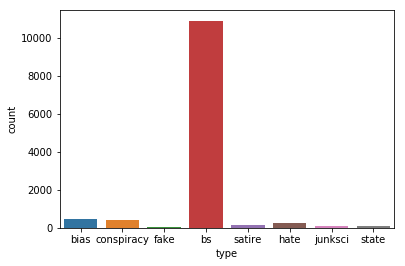

In [50]:
sns.countplot(data[data["language"]=="english"]["type"])

# Feature Preperation
** For the feature preperation we have used TFIDF module which assigs certain numbers.

In [51]:
# Preparing the TfidfVectorizer of the simpliified dataframe
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=8000)
X = vectorizer.fit_transform(ddf)
feat= vectorizer.get_feature_names()
X= X.toarray()
ddf= pd.DataFrame(X, columns=feat)
ddf

,aaron,abandon,abandoned,abc,abedin,ability,able,aboard,aborigine,abortion,...,zealand,zero,zika,zionism,zionist,zombie,zone,zones,zuckerberg,zulu
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.077468,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.041257,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.058867,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.090052,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model Preperation
For the clustering part, Kmeans algorithm is used.
The dataset is divided into 2 clusters.
Prediction is mode on the used top 5000 observations.
Along with visualization

In [52]:
# FORMING THE CLUSTER USING THE GENERATED ARRAY IN TFIDF USING KMEANS ALGORITHM
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(ddf)
kmeans.labels_
kmeans.cluster_centers_

array([[6.89484105e-04, 6.47161839e-04, 6.34073640e-04, ...,
        2.84869467e-04, 4.98552698e-04, 4.02371847e-05],
       [2.97680977e-04, 4.84297397e-04, 5.62286368e-04, ...,
        2.13532126e-04, 4.88748064e-04, 1.13629019e-04]])

# Model Evalution
Making prediction on the bunch of the data

In [53]:
# PRDICTING THE RESULT
pred= kmeans.fit_predict(ddf)


array([1, 1, 0, ..., 1, 1, 1])

In [63]:
for i in range(pred.shape[0]):
    print(pred[i])

1
1
0
1
1
0
0
0
0
1
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
1
0
1
0
1
1
1
1
1
0
0
0
0
0
0
0
1
1
0
1
1
0
1
0
0
1
1
0
0
0
1
1
0
0
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
0
0
1
1
1
1
1
0
1
0
1
0
0
1
1
1
1
1
0
1
0
1
0
0
1
1
0
1
1
1
1
0
0
1
0
0
1
0
1
1
0
1
1
1
0
0
1
1
1
1
0
1
0
1
1
1
1
0
1
1
0
1
1
0
0
1
1
1
0
0
1
0
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
0
1
1
1
1
1
0
1
1
0
1
1
1
0
1
1
0
1
1
0
0
1
1
1
1
1
1
0
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
0
1
0
1
0
1
1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
0
1
1
1
1
1
0
1
1
1
1
0
1
0
1
1
1
0
0
1
0
0
0
1
1
0
0
0
0
1
1
0
0
1
0
0
0
1
1
1
0
0
1
0
1
1
0
1
1
1
1
1
0
1
0
1
1
1
0
1
1
1
1
0
1
1
1
1
0
1
1
0
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
0
0
1
0
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
0
1
0
0
0
1
0
1


1
1
1
0
0
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
0
0
1
1
1
0
1
1
0
1
1
1
1
1
1
1
0
1
1
0
1
1
1
0
0
1
0
1
1
1
1
1
1
1
1
1
1
0
1
0
1
0
1
0
0
0
0
0
0
0
1
1
0
1
0
1
0
1
0
1
0
0
1
0
1
0
1
1
0
1
1
1
1
1
0
1
0
1
1
0
1
1
1
1
1
1
0
0
0
1
1
1
1
0
1
1
1
1
1
0
1
1
0
0
0
1
0
0
0
1
0
1
0
0
0
0
1
0
0
0
1
1
0
1
0
0
0
1
1
1
0
0
0
0
1
0
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
0
1
1
0
1
1
1
1
0
0
1
0
0
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
0
0
0
0
1
0
1
1
1
0
0
1
1
0
1
1
1
0
0
0
0
0
0
0
1
0
0
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
0
0
1
1
0
1
0
0
1
1
1
1
1
1
1
0
1
1
0
1
0
1
1
0
0
1
1
0
1
1
1
1
1
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
1
1
1
0
1
0
1
0
1
0
1
1
0
1
1
0
0
1
1
1
0
0
1
1
0
0
1
1
0
1
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
1
0
1
1
0
1
1
1
1
1
1
1
1
1
1
0
1
1
0
0
0
0
0
0
0
1
1
1
1
1
0
1
0
1
1
1
0
0
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
0
0
1
1
1
1
1
0
1
1
1
0
1
0
0
1
0
1
1
0
0
1
1
1
1
1
0
1
1
0
0
0
1
1
1
1
1
0
1
1
0
1
1
1
0
1
0
1


In [54]:
Counter(pred)

Counter({1: 8788, 0: 3615})

# slicing out some part of the data for visualization

In [55]:
ddf= ddf.iloc[:5000,:]

# Reducing the dimensionality of the data for the visualization purpose

In [56]:
import numpy as np
from sklearn.manifold import TSNE

In [57]:
X_embedded = TSNE(n_components=2).fit_transform(ddf)
X_embedded.shape

(5000, 2)

In [58]:
pred= pred[:5000]

In [59]:
pred.shape

(5000,)

# Making visualization

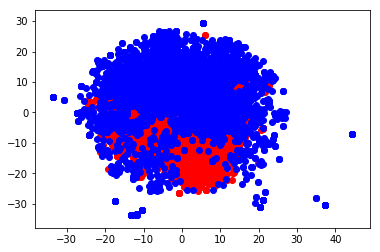

In [60]:
# MAKING THE PLOT OF THE SCATTERED DATA
plt.scatter(X_embedded[pred==0,0],X_embedded[pred==0,1],color="r")
plt.scatter(X_embedded[pred==1,0],X_embedded[pred==1,1],color="b")

In [61]:
from tkinter import messagebox
def prediction():
    new = []
    new.append([text.get()])
    new.append([title.get()])
    dd = {'text': new[0],
        'title': new[1]}
    
    data = pd.DataFrame(dd, columns = ['text', 'title'])

    data.text.fillna("", inplace=True)
    #print(data)
    all_text = data.title.str.cat(data.text, sep=' ')
    words= nltk.word_tokenize(" ".join(all_text.tolist()))
    stop_w= stopwords.words("english")
    cleanwords = [i for i in words if i not in stop_w and i.isalpha() and len(i) > 2]
    bigrams = nltk.bigrams(cleanwords)
    counter =Counter(bigrams)

    ######################
    top_k=9000
    bottom_k=13000
    fdist= FreqDist(words)
    top_k_words= fdist.most_common(top_k)
    bottom_k_words= fdist.most_common(bottom_k)
    top_f= set(zip(*top_k_words))
    bottom_f= set(zip(*bottom_k_words))
    #####################

    x = data["text"].apply(dataclean)
    #print(x)
    y = data["title"].apply(dataclean)
    ddf = x.str.cat(y,sep=" ")
    #print(ddf)
    
    X = vectorizer.transform(ddf)
    X= X.toarray()
    #print(X.shape)
    ddf= pd.DataFrame(X, columns=feat)
    pred= kmeans.predict(ddf)
    if pred[0] == 1:
        messagebox.showinfo("News Classifier", "This News is Real")
    else:
        messagebox.showinfo("News Classifier", "This News is Fake")

In [62]:
import tkinter
from tkinter import *
win = Tk()
win.geometry('650x700')
win.config(bg='lightgray')
label = Label(win, text="Real and Fake News Classifier", font=('arial', 28, 'bold'), bg='lightgray').grid(row=0,column=0,columnspan=6,sticky=NSEW, padx=10)
Frame(win,width=1000,height=5,bg="black").grid(columnspan=10,row=1,sticky=NSEW,pady=2)

label = Label(win,text="Uuid",font=('arial',10,'bold')).grid(row=3,column=1,sticky=NSEW,pady=2)
label = Label(win,text="Order in Thread",font=('arial',10,'bold')).grid(row=4,column=1,sticky=NSEW,pady=2)
label = Label(win,text="Author",font=('arial',10,'bold')).grid(row=5,column=1,sticky=NSEW,pady=2)
label = Label(win,text="Published",font=('arial',10,'bold')).grid(row=6,column=1,sticky=NSEW,pady=2)
label = Label(win,text="Title",font=('arial',10,'bold')).grid(row=7,column=1,sticky=NSEW,pady=2)
label = Label(win,text="Text",font=('arial',10,'bold')).grid(row=8,column=1,sticky=NSEW,pady=2)
label = Label(win,text="Language",font=('arial',10,'bold')).grid(row=9,column=1,sticky=NSEW,pady=2)
label = Label(win,text="Crawled",font=('arial',10,'bold')).grid(row=10,column=1,sticky=NSEW,pady=2)
label = Label(win,text="Site_url",font=('arial',10,'bold')).grid(row=11,column=1,sticky=NSEW,pady=2)
label = Label(win,text="Country",font=('arial',10,'bold')).grid(row=12,column=1,sticky=NSEW,pady=2)
label = Label(win,text="Domain rank",font=('arial',10,'bold')).grid(row=13,column=1,sticky=NSEW,pady=2)
label = Label(win,text="Thread Title",font=('arial',10,'bold')).grid(row=14,column=1,sticky=NSEW,pady=2)
label = Label(win,text="Spam Score",font=('arial',10,'bold')).grid(row=15,column=1,sticky=NSEW,pady=2)
label = Label(win,text="Main Img url",font=('arial',10,'bold')).grid(row=16,column=1,sticky=NSEW,pady=2)
label = Label(win,text="Replies Count",font=('arial',10,'bold')).grid(row=17,column=1,sticky=NSEW,pady=2)
label = Label(win,text="Participants Count",font=('arial',10,'bold')).grid(row=18,column=1,sticky=NSEW,pady=2)
label = Label(win,text="Likes",font=('arial',10,'bold')).grid(row=19,column=1,sticky=NSEW,pady=2)
label = Label(win,text="Comments",font=('arial',10,'bold')).grid(row=20,column=1,sticky=NSEW,pady=2)
label = Label(win,text="Shares",font=('arial',10,'bold')).grid(row=21,column=1,sticky=NSEW,pady=2)
label = Label(win,text="Type",font=('arial',10,'bold')).grid(row=22,column=1,sticky=NSEW,pady=2)


uuid = StringVar()
entry = Entry(win,textvariable=uuid).grid(row=3,column=2,sticky=NSEW,pady=2, padx=3, columnspan=3)
ord_in_thread = StringVar()
entry = Entry(win,textvariable=ord_in_thread).grid(row=4,column=2,sticky=NSEW,pady=2, padx=3, columnspan=3)
author = StringVar()
entry = Entry(win,textvariable=author).grid(row=5,column=2,sticky=NSEW,pady=2, padx=3, columnspan=3)
published = StringVar()
entry = Entry(win,textvariable=published).grid(row=6,column=2,sticky=NSEW,pady=2, padx=3, columnspan=3)
title = StringVar()
entry = Entry(win,textvariable=title).grid(row=7,column=2,sticky=NSEW,pady=2, padx=3, columnspan=3)
text = StringVar()
entry = Entry(win,textvariable=text).grid(row=8,column=2,sticky=NSEW,pady=2, padx=3, columnspan=3)
language = StringVar()
entry = Entry(win, textvariable=language).grid(row=9,column=2,sticky=NSEW,pady=2, padx=3, columnspan=3)
crawled = StringVar()
entry = Entry(win,textvariable=crawled).grid(row=10,column=2,sticky=NSEW,pady=2, padx=3, columnspan=3)
site_url = StringVar()
entry = Entry(win,textvariable=site_url).grid(row=11,column=2,sticky=NSEW,pady=2, padx=3, columnspan=3)
country = StringVar()
entry = Entry(win,textvariable=country).grid(row=12,column=2,sticky=NSEW,pady=2, padx=3, columnspan=3)
domain_rank = StringVar()
entry=Entry(win,textvariable=domain_rank).grid(row=13,column=2,sticky=NSEW,pady=2, padx=3, columnspan=3)
thread_title = StringVar()
entry = Entry(win,textvariable=thread_title).grid(row=14,column=2,sticky=NSEW,pady=2, padx=3, columnspan=3)
spam_score = StringVar()
entry=Entry(win,textvariable=spam_score).grid(row=15,column=2,sticky=NSEW,pady=2, padx=3, columnspan=3)
main_img_url = StringVar()
entry = Entry(win,textvariable=main_img_url).grid(row=16,column=2,sticky=NSEW,pady=2, padx=3, columnspan=3)
replies_count = StringVar()
entry = Entry(win,textvariable=replies_count).grid(row=17,column=2,sticky=NSEW,pady=2, padx=3, columnspan=3)
participants_count = StringVar()
entry = Entry(win,textvariable=participants_count).grid(row=18,column=2,sticky=NSEW,pady=2, padx=3, columnspan=3)
likes = StringVar()
entry = Entry(win,textvariable=likes).grid(row=19,column=2,sticky=NSEW,pady=2, padx=3, columnspan=3)
comments = StringVar()
entry = Entry(win,textvariable=comments).grid(row=20,column=2,sticky=NSEW,pady=2, padx=3, columnspan=3)
shares = StringVar()
entry = Entry(win,textvariable=shares).grid(row=21,column=2,sticky=NSEW,pady=2, padx=3, columnspan=3)
types = StringVar()
entry = Entry(win,textvariable=types).grid(row=22,column=2,sticky=NSEW,pady=2, padx=3, columnspan=3)

btn=Button(win,text="SUBMIT",font=('arial',25,'bold'),command=prediction).grid(row=23,column=1, pady=8,columnspan=2,sticky=NE)
mainloop()

# Conclusion:
In today's scenario with the advent of Internet we see bunch of news circulating every hour and minutes and descriminating them with real or fake cat. is very difficult task.
Fake news can work as supporing out wrong opinion or on the other side changing our right opinion about something.
So the goal of this poject is to classify the news into real and fake with the help of some unique words falling in such news.
In this kernal I have a sort of cluster analysis on the classfificaiton of fake and real news data.
In the data analsis part I have sorted out and removed the most and the least occuring words from the data, so as to make the proper discrimination between fake and the real data.
The cleaning of the data is done through removal of the stopwords and words getting lemmatized to the base form.
Finally the prediction is made on the data with near 12000 observations and 8000 columns and the visualization can be seen above.
Thus the model trained above can be used at any social media to classify the real and fake news.